# SQL Project Description

You're working as an analyst for Zuber, a new ride-sharing company that's launching in Chicago. Your task is to find patterns in the available information. You want to understand passenger preferences and the impact of external factors on rides. Working with a database, you'll analyze data from competitors and test a hypothesis about the impact of weather on ride frequency.

## Purpose of the project
- import and study the datasets
- tidy up the datasets when needed
- identify the top 10 neighborhoods in terms of drop-offs
- make graphs: taxi companies and number of rides, top 10 neighborhoods by number of dropoffs
- draw conclusions based on each graph and explain the results
- perform hypotheses testing and check whether the average duration of rides from the Loop to O'Hare International Airport changes on rainy Saturdays.

## Initialization


In [1]:
# Loading all the libraries

import pandas as pd
import numpy as np 
from matplotlib import pyplot as plt
import seaborn as sns
from scipy import stats as st
import math as mt

## Load data


In [2]:
# Load the data files into different DataFrames

try: 
    sql_result_01 = pd.read_csv('datasets/project_sql_result_01.csv')
    sql_result_04 = pd.read_csv('datasets/project_sql_result_04.csv')
    sql_result_07 = pd.read_csv('datasets/project_sql_result_07.csv')
except:
    sql_result_01 = pd.read_csv('/datasets/project_sql_result_01.csv')
    sql_result_04 = pd.read_csv('/datasets/project_sql_result_04.csv')
    sql_result_07 = pd.read_csv('/datasets/project_sql_result_07.csv')

In [3]:
sql_result_01.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64 entries, 0 to 63
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   company_name  64 non-null     object
 1   trips_amount  64 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 1.1+ KB


In [4]:
display(sql_result_01.head(10))

,company_name,trips_amount
0,Flash Cab,19558
1,Taxi Affiliation Services,11422
2,Medallion Leasin,10367
3,Yellow Cab,9888
4,Taxi Affiliation Service Yellow,9299
5,Chicago Carriage Cab Corp,9181
6,City Service,8448
7,Sun Taxi,7701
8,Star North Management LLC,7455
9,Blue Ribbon Taxi Association Inc.,5953


In [5]:
sql_result_01_missing_perct = (sql_result_01.isna().sum())/sql_result_01.shape[0]*100
print(sql_result_01_missing_perct)

company_name    0.0
trips_amount    0.0
dtype: float64


The dataset `sql_result_01` has two columns:
- `company_name` is the taxi company name.
- `trips_amount` is the the number of rides for each taxi company on November 15-16, 2017.

Both columns have the correct data types and do not contain missing values. This dataset looks good.

In [6]:
sql_result_04.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94 entries, 0 to 93
Data columns (total 2 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   dropoff_location_name  94 non-null     object 
 1   average_trips          94 non-null     float64
dtypes: float64(1), object(1)
memory usage: 1.6+ KB


In [7]:
display(sql_result_04.head())

,dropoff_location_name,average_trips
0,Loop,10727.466667
1,River North,9523.666667
2,Streeterville,6664.666667
3,West Loop,5163.666667
4,O'Hare,2546.900000


In [8]:
sql_result_04_missing_perct = (sql_result_04.isna().sum())/sql_result_04.shape[0]*100
print(sql_result_04_missing_perct)


dropoff_location_name    0.0
average_trips            0.0
dtype: float64


The dataset `sql_result_04` has two columns:
- `dropoff_location_name` is the Chicago neighborhoods where rides ended.
- `average_trips` is the average number of rides that ended in each neighborhood in November 2017.

Both columns do not contain missing values. The data type of the `dropoff_location_name` looks good. But it makes more sense for the data type of the `average_trips` to be integer. Thus, we will change the data type of the `average_trips` from `float` to `int64`.


In [9]:
sql_result_04['average_trips'] = sql_result_04['average_trips'].astype('int64')

Now, let's have a look at the information and first 5 rows of the dataset again.

In [10]:
sql_result_04.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94 entries, 0 to 93
Data columns (total 2 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   dropoff_location_name  94 non-null     object
 1   average_trips          94 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 1.6+ KB


In [11]:
display(sql_result_04.head())

,dropoff_location_name,average_trips
0,Loop,10727
1,River North,9523
2,Streeterville,6664
3,West Loop,5163
4,O'Hare,2546


The dataset `sql_result_04` looks good.

### The top 10 neighborhoods in terms of drop-offs

In [12]:
top10_neighborhoods = sql_result_04.sort_values(by='average_trips', ascending=False).head(10)
print(top10_neighborhoods)

  dropoff_location_name  average_trips
0                  Loop          10727
1           River North           9523
2         Streeterville           6664
3             West Loop           5163
4                O'Hare           2546
5             Lake View           2420
6            Grant Park           2068
7         Museum Campus           1510
8            Gold Coast           1364
9    Sheffield & DePaul           1259


### Make graphs

#### Taxi companies and number of rides 


In [13]:
top10_companies = sql_result_01.sort_values(by='trips_amount', ascending=False).head(10)
print(top10_companies)


                        company_name  trips_amount
0                          Flash Cab         19558
1          Taxi Affiliation Services         11422
2                   Medallion Leasin         10367
3                         Yellow Cab          9888
4    Taxi Affiliation Service Yellow          9299
5          Chicago Carriage Cab Corp          9181
6                       City Service          8448
7                           Sun Taxi          7701
8          Star North Management LLC          7455
9  Blue Ribbon Taxi Association Inc.          5953


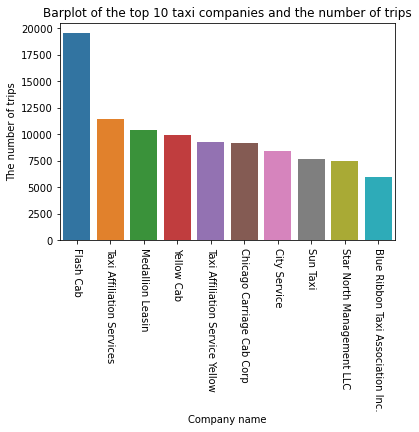

In [14]:

ax = sns.barplot(x="company_name", y="trips_amount", data=top10_companies)
plt.xticks(rotation=270);

ax.set(xlabel="Company name", 
       ylabel="The number of trips",
       title = 'Barplot of the top 10 taxi companies and the number of trips');


The barplot of the top 10 taxi companies and the number of trips shows that Flash Cab had the highest number of trips. Its number of trips is significantly higher than those from any other taxi companies.  

#### Top 10 neighborhoods by number of dropoffs


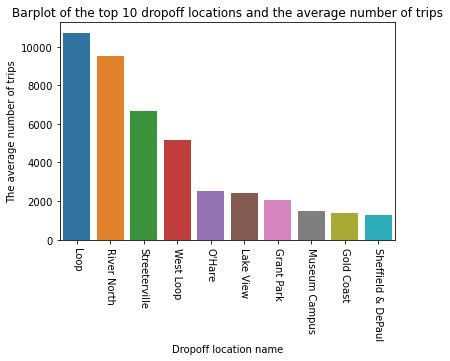

In [15]:

ax = sns.barplot(x="dropoff_location_name", y="average_trips", data=top10_neighborhoods)
plt.xticks(rotation=270);

ax.set(xlabel="Dropoff location name", 
       ylabel="The average number of trips",
       title = 'Barplot of the top 10 dropoff locations and the average number of trips');


The barplot of the top 10 dropoff locations and the average number of trips shows that Loop and River North had significantly higher number of trips than any other drop off locations. 

##  Testing hypotheses

First, let's look at the dataset `sql_result_07`.

In [16]:
sql_result_07.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1068 entries, 0 to 1067
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   start_ts            1068 non-null   object 
 1   weather_conditions  1068 non-null   object 
 2   duration_seconds    1068 non-null   float64
dtypes: float64(1), object(2)
memory usage: 25.2+ KB


In [18]:
display(sql_result_07.head(10))

,start_ts,weather_conditions,duration_seconds
0,2017-11-25 16:00:00,Good,2410.0
1,2017-11-25 14:00:00,Good,1920.0
2,2017-11-25 12:00:00,Good,1543.0
3,2017-11-04 10:00:00,Good,2512.0
4,2017-11-11 07:00:00,Good,1440.0
5,2017-11-11 04:00:00,Good,1320.0
6,2017-11-04 16:00:00,Bad,2969.0
7,2017-11-18 11:00:00,Good,2280.0
8,2017-11-11 14:00:00,Good,2460.0
9,2017-11-11 12:00:00,Good,2040.0


In [19]:
sql_result_07_missing_perct = (sql_result_07.isna().sum())/sql_result_07.shape[0]*100
print(sql_result_07_missing_perct)

# sql_result_07['start_ts'] = pd.to_datetime(sql_result_07['start_ts'], 
#                                            format='%Y-%m-%d %H:%M:%S')

start_ts              0.0
weather_conditions    0.0
duration_seconds      0.0
dtype: float64


The dataset `sql_result_07` has three columns:
- `start_ts` is the pickup date and time.
- `weather_conditions` is the weather conditions at the moment the ride started.
- `duration_seconds` is the ride duration in seconds. 

All three columns do not contain missing values. The data types of all three columns look good. The dataset `sql_result_07` looks good.

Let's test the hypothesis that the average duration of rides from the Loop to O'Hare International Airport changes on rainy Saturdays. That is, we want to test:
$$ H_0: \mu_{1} =  \mu_{2}$$
$$ H_a: \mu_{1} \ne  \mu_{2}$$
where $\mu_{1}$ is the average duration of rides from the Loop to O'Hare International Airport on good days, and $\mu_{2}$ is the average duration of rides from the Loop to O'Hare International Airport on bad/rainy days.

We will use alpha = 0.05 and hypothesis tests the equality of two population means. 

In [19]:
data_good = sql_result_07[sql_result_07['weather_conditions']=='Good']
data_bad = sql_result_07[sql_result_07['weather_conditions']=='Bad']
display(data_good)
display(data_bad)

,start_ts,weather_conditions,duration_seconds
0,2017-11-25 16:00:00,Good,2410.0
1,2017-11-25 14:00:00,Good,1920.0
2,2017-11-25 12:00:00,Good,1543.0
3,2017-11-04 10:00:00,Good,2512.0
4,2017-11-11 07:00:00,Good,1440.0
...,...,...,...
1062,2017-11-11 06:00:00,Good,1500.0
1063,2017-11-25 11:00:00,Good,0.0
1064,2017-11-11 10:00:00,Good,1318.0
1065,2017-11-11 13:00:00,Good,2100.0


,start_ts,weather_conditions,duration_seconds
6,2017-11-04 16:00:00,Bad,2969.0
30,2017-11-18 12:00:00,Bad,1980.0
34,2017-11-04 17:00:00,Bad,2460.0
51,2017-11-04 16:00:00,Bad,2760.0
52,2017-11-18 12:00:00,Bad,2460.0
...,...,...,...
1031,2017-11-18 12:00:00,Bad,2560.0
1032,2017-11-18 10:00:00,Bad,1908.0
1053,2017-11-18 12:00:00,Bad,2400.0
1061,2017-11-18 16:00:00,Bad,2186.0


In [20]:
# Test the hypotheses
alpha = 0.05
results = st.ttest_ind(data_good["duration_seconds"], data_bad["duration_seconds"])
print('p-value:', results.pvalue)

p-value: 6.517970327099473e-12


In [21]:
if results.pvalue < alpha:
    print("We reject the null hypothesis.")
else:
    print("We can't reject the null hypothesis.")

We reject the null hypothesis.


Thus, with 95% confidence, we conclude that the average duration of rides from the Loop to O'Hare International Airport changes on rainy Saturdays.

## General conclusion

In this project, we analyzed three datasets. The major steps for analyzing the data are:

1. Load datasets and perform initial data exploration
2. Fix and enrich data by changing data types and creating new datasets and variables when appropriate
3. identify the top 10 neighborhoods in terms of drop-offs
4. make graphs: taxi companies and number of rides, top 10 neighborhoods by number of dropoffs
5. draw conclusions based on each graph and explain the results
6. perform hypotheses testing and check whether the average duration of rides from the Loop to O'Hare International Airport changes on rainy Saturdays.

The main findings are:
- The company named Flash Cab had the highest number of trips. Its number of trips is significantly higher than those from any other taxi companies.
- The top two drop off locations Loop and River North had significantly higher number of trips than any other drop off locations.
- With 95% confidence, we conclude that the average duration of rides from the Loop to O'Hare International Airport changes on rainy Saturdays.

Customers may prefer to use the service from the company named Flash Cab. It is worthwhile to study why this company had much more trips than other companies. The top two drop off locations Loop and River North. So taxi drivers may choose to wait and pick up customers from these two location to have a higher chance of picking up customers. Rainy or bad weather on Saturdays might significantly change the drive duration from the Loop to O'Hare International Airport. Customers who travel on rainy Saturdays may need to plan for some buffer time for longer than usual traffic time.   